<a href="https://colab.research.google.com/github/karanpk02/EXternal-Disturbance-and-state-variable-example-Python/blob/main/How_External_Disturbance_w(t)_with_state_variable_x(t)_controlling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

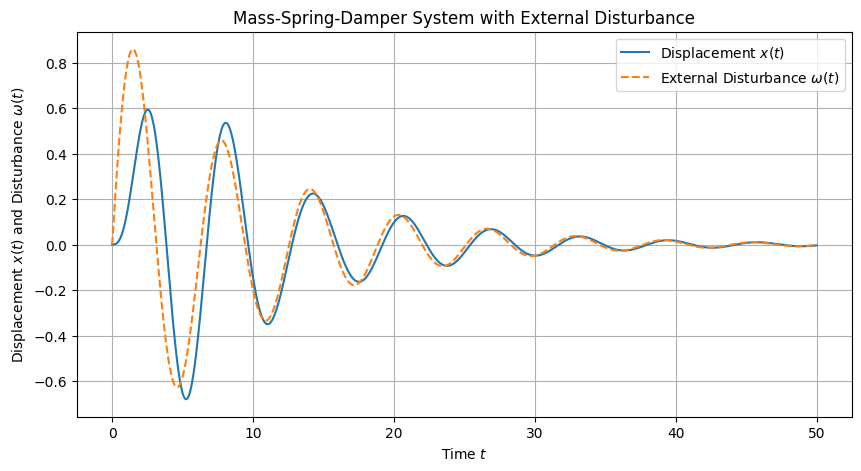

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# System parameters
m = 1.0
c = 0.5
k = 2.0

# External disturbance
def omega(t):
    return np.exp(-0.1 * t) * np.sin(t)

# Differential equation
def mass_spring_damper(x, t):
    x1, x2 = x
    dxdt = [x2, (omega(t) - c*x2 - k*x1) / m]
    return dxdt

# Initial conditions
x0 = [0, 0]

# Time points
t = np.linspace(0, 50, 1000)

# Solve ODE
x = odeint(mass_spring_damper, x0, t)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(t, x[:, 0], label='Displacement $x(t)$')
plt.plot(t, omega(t), label='External Disturbance $\omega(t)$', linestyle='--')
plt.xlabel('Time $t$')
plt.ylabel('Displacement $x(t)$ and Disturbance $\omega(t)$')
plt.legend()
plt.title('Mass-Spring-Damper System with External Disturbance')
plt.grid(True)
plt.show()

In [ ]:
# Install fastdtw if not already installed
!pip install fastdtw

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

# Sample data for demonstration
data1 = {
    'Date': pd.date_range(start='2014-08-29', periods=365, freq='D'),
    'Cases': np.random.randint(1000, 2000, size=365),
    'Deaths': np.random.randint(100, 200, size=365),
    'Rolling_Sum_Cases': np.random.randint(5000, 10000, size=365),
    'Rolling_Sum_Deaths': np.random.randint(1000, 3000, size=365)
}
df1 = pd.DataFrame(data1)

data2 = {
    'Date': pd.date_range(start='2014-08-29', periods=365, freq='D'),
    'Cases': np.random.randint(800, 1800, size=365),
    'Deaths': np.random.randint(80, 180, size=365),
    'Rolling_Sum_Cases': np.random.randint(4000, 9000, size=365),
    'Rolling_Sum_Deaths': np.random.randint(900, 2900, size=365)
}
df2 = pd.DataFrame(data2)

data3 = {
    'Date': pd.date_range(start='2014-08-29', periods=365, freq='D'),
    'Cases': np.random.randint(1200, 2200, size=365),
    'Deaths': np.random.randint(120, 220, size=365),
    'Rolling_Sum_Cases': np.random.randint(6000, 11000, size=365),
    'Rolling_Sum_Deaths': np.random.randint(1100, 3100, size=365)
}
df3 = pd.DataFrame(data3)

# Normalize the rolling sum data
scaler = StandardScaler()
df1[['Rolling_Sum_Cases', 'Rolling_Sum_Deaths']] = scaler.fit_transform(df1[['Rolling_Sum_Cases', 'Rolling_Sum_Deaths']])
df2[['Rolling_Sum_Cases', 'Rolling_Sum_Deaths']] = scaler.fit_transform(df2[['Rolling_Sum_Cases', 'Rolling_Sum_Deaths']])
df3[['Rolling_Sum_Cases', 'Rolling_Sum_Deaths']] = scaler.fit_transform(df3[['Rolling_Sum_Cases', 'Rolling_Sum_Deaths']])

# Convert the series to numpy arrays
df1_cases = df1['Rolling_Sum_Cases'].values
df2_cases = df2['Rolling_Sum_Cases'].values

# Apply Dynamic Time Warping (DTW) to align the time series
distance, path = fastdtw(df1_cases, df2_cases, dist=euclidean)

# Identify key features (maxima, minima, and inflection points)
def identify_features(series):
    maxima = argrelextrema(series, np.greater)[0]
    minima = argrelextrema(series, np.less)[0]
    return maxima, minima

maxima1, minima1 = identify_features(df1_cases)
maxima2, minima2 = identify_features(df2_cases)
maxima3, minima3 = identify_features(df3['Rolling_Sum_Cases'].values)

# Visualize the results
plt.figure(figsize=(14, 8))

# Plot df1
plt.subplot(3, 1, 1)
plt.plot(df1['Date'], df1_cases, label='Guinea')
plt.scatter(df1['Date'].iloc[maxima1], df1_cases[maxima1], color='red', label='Maxima')
plt.scatter(df1['Date'].iloc[minima1], df1_cases[minima1], color='blue', label='Minima')
plt.title('Guinea Rolling Sum of Cases')
plt.legend()

plt.show()




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512613 sha256=4cb43026a56fa472bfd3be30d7d3bf93565f41d25cd9e36dda069a42ea37bb33
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


ValueError: Input vector should be 1-D.

In [ ]:

# Plot df2
plt.subplot(3, 1, 2)
plt.plot(df2['Date'], df2_cases, label='Liberia')
plt.scatter(df2['Date'].iloc[maxima2], df2_cases[maxima2], color='red', label='Maxima')
plt.scatter(df2['Date'].iloc[minima2], df2_cases[minima2], color='blue', label='Minima')
plt.title('Liberia Rolling Sum of Cases')
plt.legend()

# Plot df3
plt.subplot(3, 1, 3)
plt.plot(df3['Date'], df3['Rolling_Sum_Cases'], label='Sierra Leone')
plt.scatter(df3['Date'].iloc[maxima3], df3['Rolling_Sum_Cases'].iloc[maxima3], color='red', label='Maxima')
plt.scatter(df3['Date'].iloc[minima3], df3['Rolling_Sum_Cases'].iloc[minima3], color='blue', label='Minima')
plt.title('Sierra Leone Rolling Sum of Cases')
plt.legend()

plt.tight_layout()

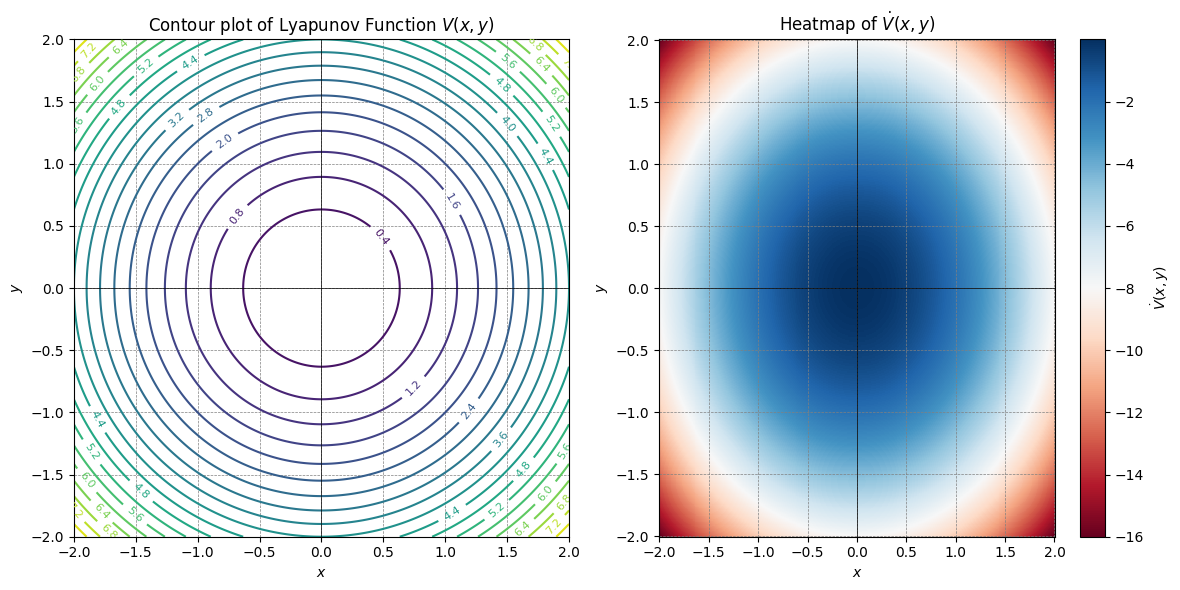

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Lyapunov function and its derivative
def V(x, y):
    return x**2 + y**2

def dV_dt(x, y):
    return -2 * (x**2 + y**2)

# Create a grid of points
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = V(X, Y)
dZ_dt = dV_dt(X, Y)

# Plot the Lyapunov function
plt.figure(figsize=(12, 6))

# Subplot 1: Contour plot of the Lyapunov function
plt.subplot(1, 2, 1)
contour = plt.contour(X, Y, Z, levels=20)
plt.clabel(contour, inline=True, fontsize=8)
plt.title('Contour plot of Lyapunov Function $V(x, y)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

# Subplot 2: Heatmap of the derivative of the Lyapunov function
plt.subplot(1, 2, 2)
heatmap = plt.pcolormesh(X, Y, dZ_dt, shading='auto', cmap='RdBu')
plt.colorbar(heatmap, label='$\dot{V}(x, y)$')
plt.title('Heatmap of $\dot{V}(x, y)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

plt.tight_layout()
plt.show()

In [ ]:
!pip install sympy


In [ ]:
import sympy as sp

# Define the symbols
x, y = sp.symbols('x y')

# Define the function V(x, y) = x^2 + y^2
V = x**2 + y**2

# Print the function
print(f"Step 1: Define the function V(x, y) = {V}")

# Compute the partial derivatives
V_x = sp.diff(V, x)
V_y = sp.diff(V, y)

# Print the partial derivatives
print(f"Step 2: Compute the partial derivative with respect to x: ∂V/∂x = {V_x}")
print(f"Step 3: Compute the partial derivative with respect to y: ∂V/∂y = {V_y}")

# Define the system dynamics
dx = -x
dy = -y

# Print the system dynamics
print(f"Step 4: Define the system dynamics: dx/dt = {dx}, dy/dt = {dy}")

# Compute the time derivative of V using the chain rule
dV_dt = V_x * dx + V_y * dy

# Print the time derivative of V
print(f"Step 5: Compute the time derivative of V: dV/dt = {dV_dt}")

# Simplify the expression (if possible)
dV_dt_simplified = sp.simplify(dV_dt)

# Print the simplified time derivative of V
print(f"Step 6: Simplify the time derivative of V (if possible): dV/dt = {dV_dt_simplified}")


Step 1: Define the function V(x, y) = x**2 + y**2
Step 2: Compute the partial derivative with respect to x: ∂V/∂x = 2*x
Step 3: Compute the partial derivative with respect to y: ∂V/∂y = 2*y
Step 4: Define the system dynamics: dx/dt = -x, dy/dt = -y
Step 5: Compute the time derivative of V: dV/dt = -2*x**2 - 2*y**2
Step 6: Simplify the time derivative of V (if possible): dV/dt = -2*x**2 - 2*y**2
